In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

hypothesis testing:

whether the observed effect in our data is real or whether it could happen simply by chance

This is the basis of hypothesis testing, what is the probability of seeing the observed effect on our null data

“Could the most extreme value happen by chance?”

In [2]:
plt.rcParams['figure.figsize']=[15,5]

In [4]:
url = "https://raw.githubusercontent.com/Patrick-David/Stocks_Significance_PHacking/master/spx.csv"

df = pd.read_csv(url,index_col='date',parse_dates=True)
df.head()

,close
date,
1986-01-02,209.59
1986-01-03,210.88
1986-01-06,210.65
1986-01-07,213.80
1986-01-08,207.97


In [5]:
daily_ret = df['close'].pct_change()
daily_ret.dropna(inplace=True)
daily_ret.head()

date
1986-01-03    0.006155
1986-01-06   -0.001091
1986-01-07    0.014954
1986-01-08   -0.027268
1986-01-09   -0.008944
Name: close, dtype: float64

In [6]:
monthly_annu = daily_ret.resample('M').std()*np.sqrt(12)
monthly_annu.head()

date
1986-01-31    0.033317
1986-02-28    0.023585
1986-03-31    0.027961
1986-04-30    0.037426
1986-05-31    0.027412
Freq: M, Name: close, dtype: float64

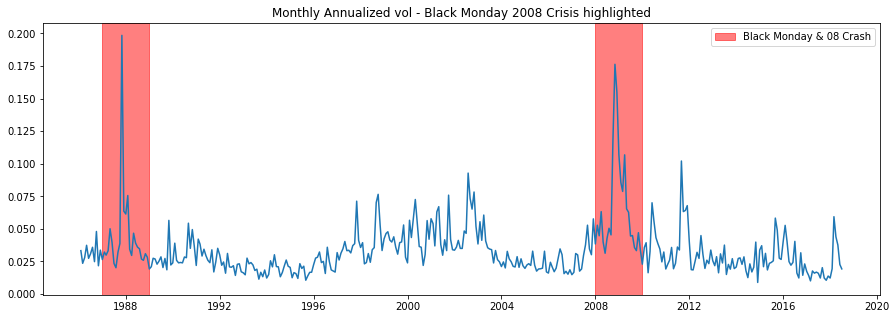

In [8]:
plt.plot(monthly_annu)
plt.axvspan('1987','1989', color='r',alpha=.5)
plt.axvspan('2008','2010', color='r',alpha=.5)
plt.title('Monthly Annualized vol - Black Monday 2008 Crisis highlighted')
labs = mpatches.Patch(color='red',
                      alpha=.5,
                      label='Black Monday & 08 Crash'
                )

plt.legend(handles=[labs])
plt.show()

In [14]:
ranked = monthly_annu.groupby(monthly_annu.index.year).rank()
final = ranked.groupby(ranked.index.month).mean()
final.describe

<bound method NDFrame.describe of date
1     6.818182
2     6.666667
3     6.575758
4     7.303030
5     6.606061
6     6.030303
7     6.031250
8     5.875000
9     6.406250
10    7.531250
11    6.343750
12    5.218750
Name: close, dtype: float64>

In [18]:
fin = abs(final - final.mean())
print(fin.sort_values())
Oct_value = fin[10]
Dec_value = fin[12]

print(f'Extreme Dec Value: {Dec_value}')
print(f'Extreme Oct Value: {Oct_value}')

date
9     0.044271
11    0.106771
3     0.125237
5     0.155540
2     0.216146
1     0.367661
7     0.419271
6     0.420218
8     0.575521
4     0.852509
10    1.080729
12    1.231771
Name: close, dtype: float64
Extreme Dec Value: 1.231770833333333
Extreme Oct Value: 1.080729166666667


In [16]:
fin

date
1     0.367661
2     0.216146
3     0.125237
4     0.852509
5     0.155540
6     0.420218
7     0.419271
8     0.575521
9     0.044271
10    1.080729
11    0.106771
12    1.231771
Name: close, dtype: float64